In [1]:
!pip install amazon-textract-textractor[pdfium]==1.8.2

  Using cached amazon_textract_textractor-1.8.2-py3-none-any.whl.metadata (9.7 kB)
  Using cached XlsxWriter-3.2.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached amazon_textract_caller-0.2.4-py2.py3-none-any.whl.metadata (7.2 kB)
  Using cached editdistance-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached pypdfium2-4.30.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (48 kB)
  Using cached amazon_textract_response_parser-1.0.3-py2.py3-none-any.whl.metadata (11 kB)
Using cached amazon_textract_textractor-1.8.2-py3-none-any.whl (307 kB)
Using cached amazon_textract_caller-0.2.4-py2.py3-none-any.whl (13 kB)
Using cached editdistance-0.8.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (401 kB)
Using cached XlsxWriter-3.2.0-py3-none-any.whl (159 kB)
Using cached pypdfium2-4.30.0-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.8 MB)
Using cached amazon_textract_response_parser-1.0.3-py2.py3-none-an

In [2]:
import sagemaker

# Get the SageMaker session and default bucket
sagemaker_session = sagemaker.Session()
default_bucket = sagemaker_session.default_bucket()
print(f"Default sagemaker bucket: {default_bucket}")

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
Default sagemaker bucket: sagemaker-us-east-1-626723862963


In [3]:
#download a pdf if required
sample_paper_url = "https://arxiv.org/pdf/1706.03762"
!wget -O ./data/my_document.pdf {sample_paper_url} --no-check-certificate

--2024-08-15 11:59:43--  https://arxiv.org/pdf/1706.03762
Resolving arxiv.org (arxiv.org)... 151.101.195.42, 151.101.3.42, 151.101.67.42, ...
Connecting to arxiv.org (arxiv.org)|151.101.195.42|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 2215244 (2.1M) [application/pdf]
Saving to: ‘./data/my_document.pdf’

./data/my_document. 100%[===================>]   2.11M  --.-KB/s    in 0.009s  

2024-08-15 11:59:43 (239 MB/s) - ‘./data/my_document.pdf’ saved [2215244/2215244]



In [4]:
#copy data folder with sample pdf files to S3"
!aws s3 sync ./data s3://{default_bucket}/data

upload: data/attention_is_all_you_need.pdf to s3://sagemaker-us-east-1-626723862963/data/attention_is_all_you_need.pdf
upload: data/.ipynb_checkpoints/attention_is_all_you_need-checkpoint.pdf to s3://sagemaker-us-east-1-626723862963/data/.ipynb_checkpoints/attention_is_all_you_need-checkpoint.pdf
upload: data/attention_is_all_you_need-10-pages.pdf to s3://sagemaker-us-east-1-626723862963/data/attention_is_all_you_need-10-pages.pdf


In [5]:
document = "data/paper-sample-10-pages.pdf"
document = "data/my_document.pdf"
document_s3_url = f"s3://{default_bucket}/{document}"

In [6]:
import os
from textractor import Textractor
from textractor.data.constants import TextractFeatures

In [7]:
from textractor import Textractor
from textractor.data.constants import TextractFeatures
from textractor.data.text_linearization_config import TextLinearizationConfig

extractor = Textractor()
document = extractor.start_document_analysis(
    document_s3_url,    
    features=[TextractFeatures.LAYOUT, TextractFeatures.FORMS, TextractFeatures.TABLES],
    save_image=True
)

In [8]:
document

## Using Layout Analysis

Try the [interactive Textract Demo for layout analysis](https://us-east-1.console.aws.amazon.com/textract/home?region=us-east-1#/demo) in the AWS Console.
![alt text](images/layout_analysis_attention_page_0.png "Layout analysis of first page")


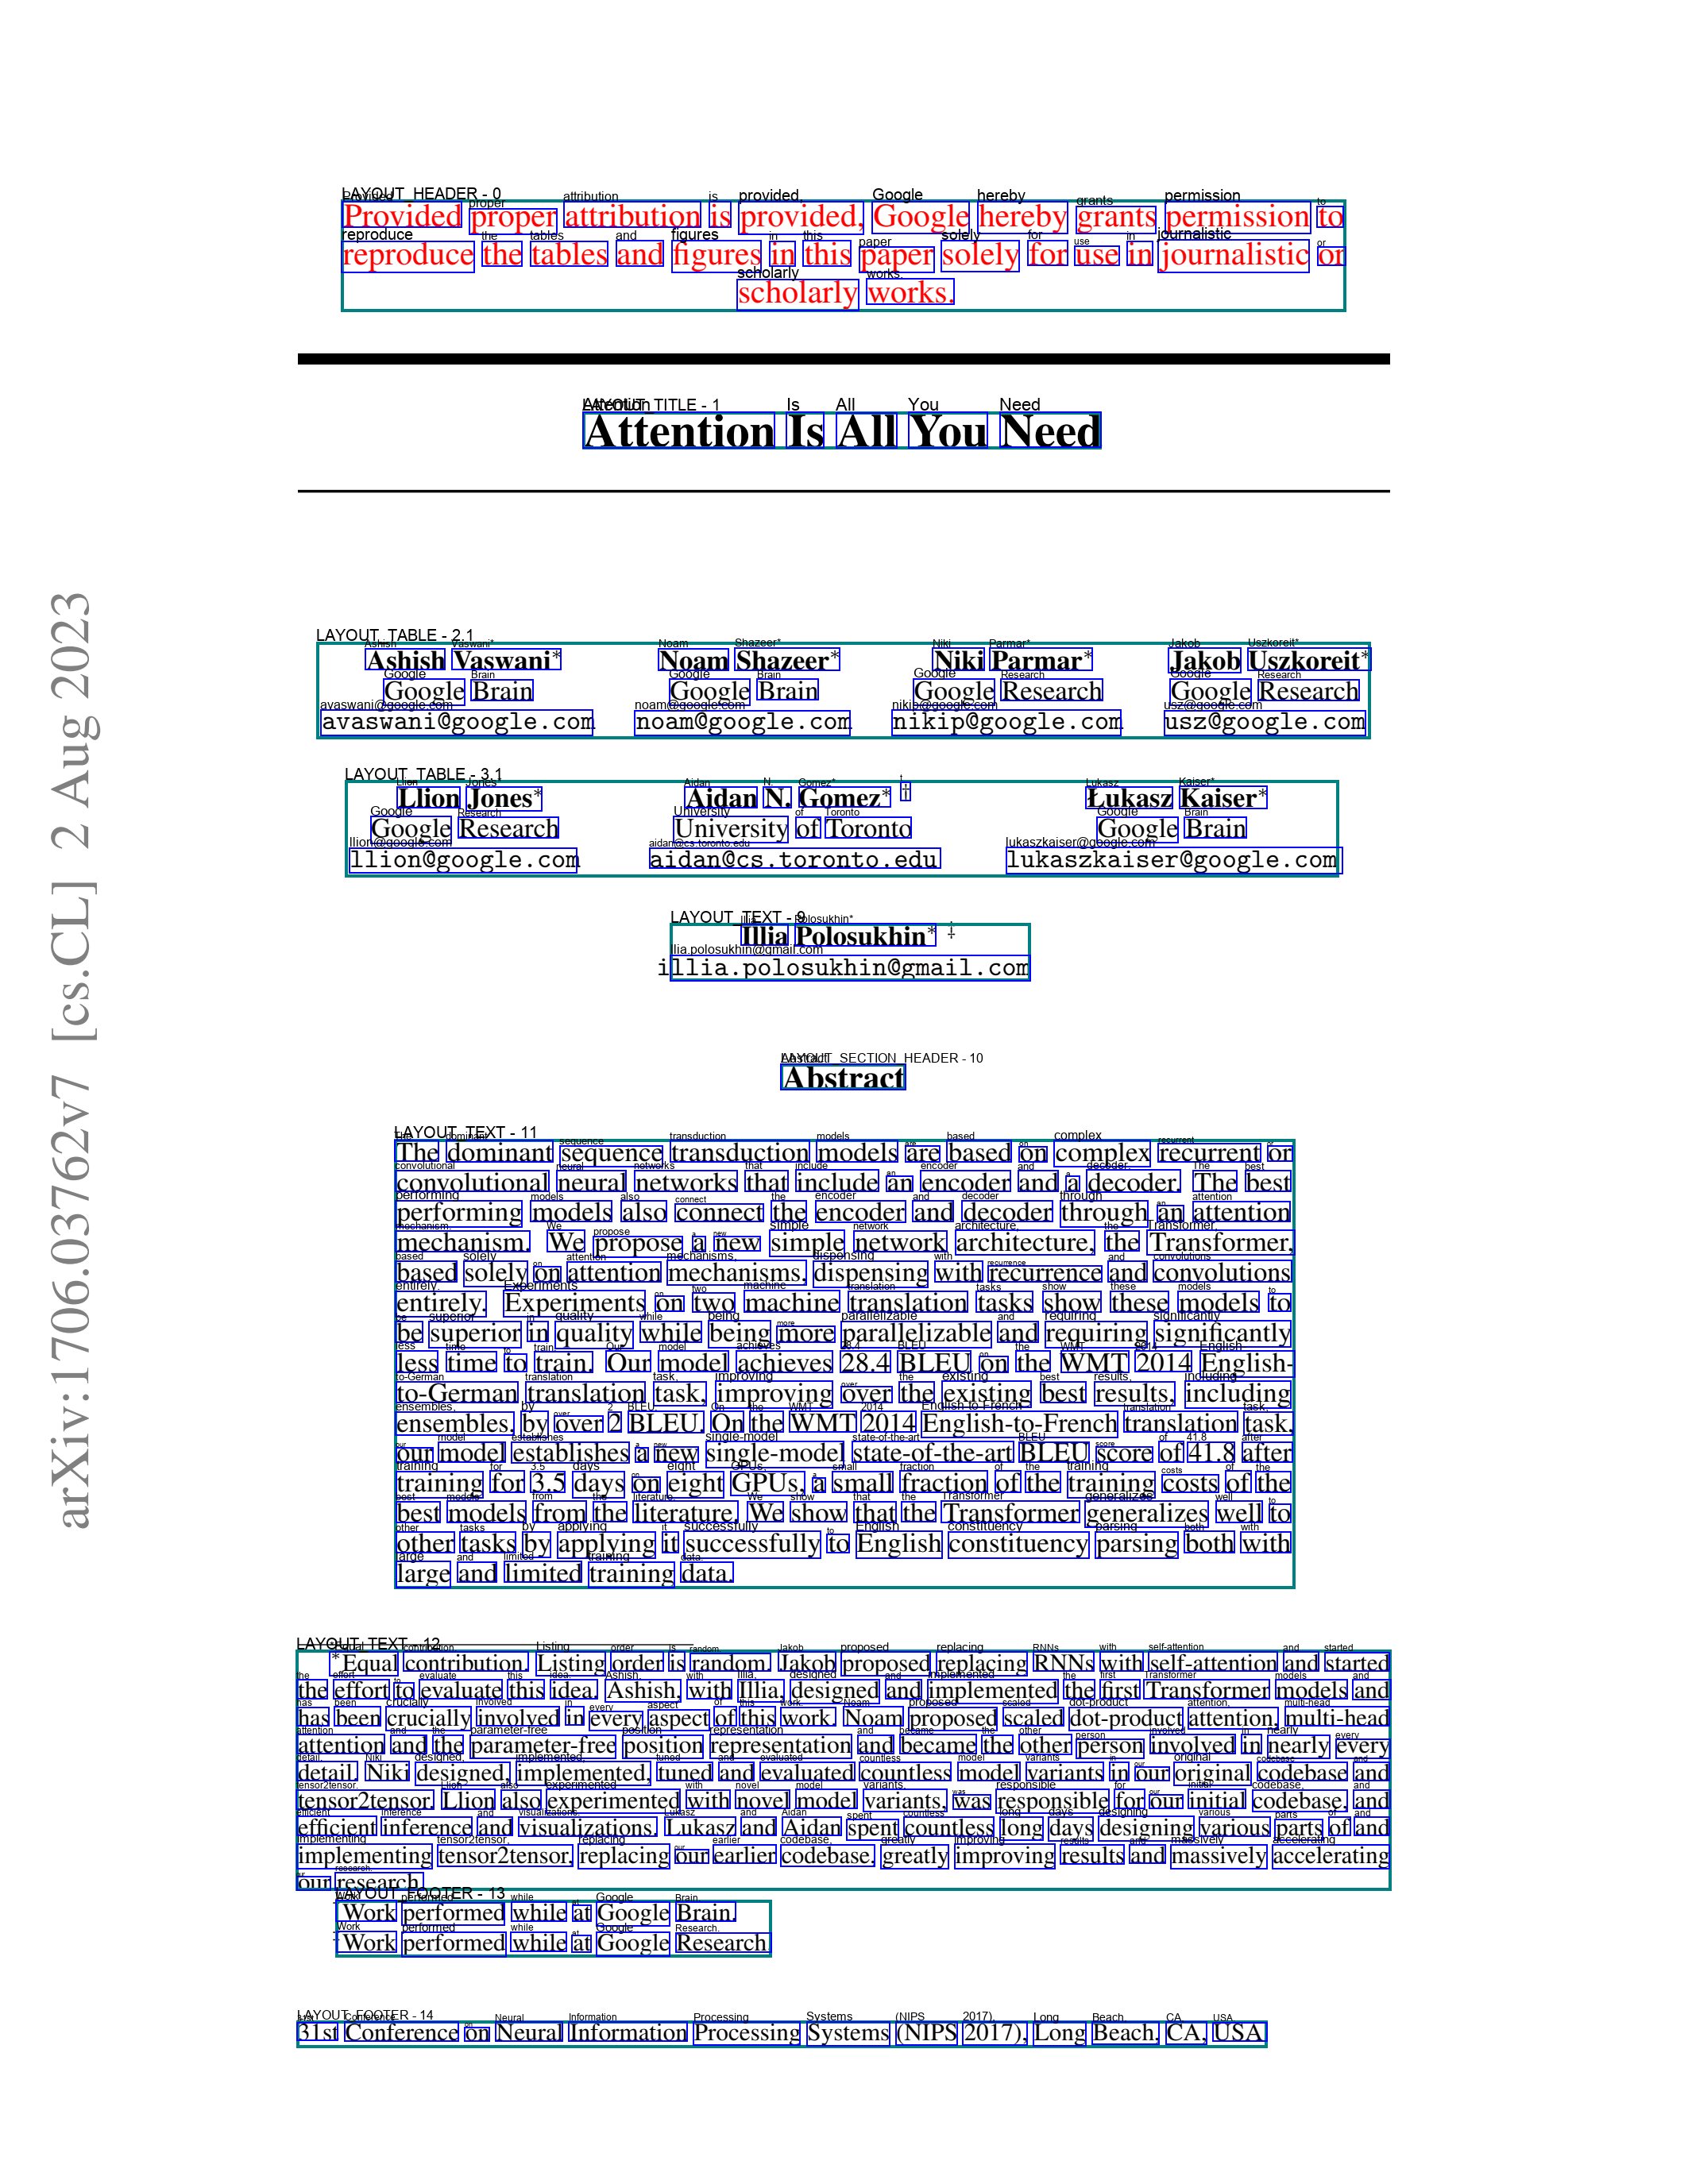

In [9]:
#document.pages[0].page_layout.titles[0].visualize().convert("RGB")
document.pages[0].layouts.visualize().convert("RGB")

## Tabular Data Linearization

* [Samples on tabular data linearization](https://aws-samples.github.io/amazon-textract-textractor/notebooks/tabular_data_linearization.html)

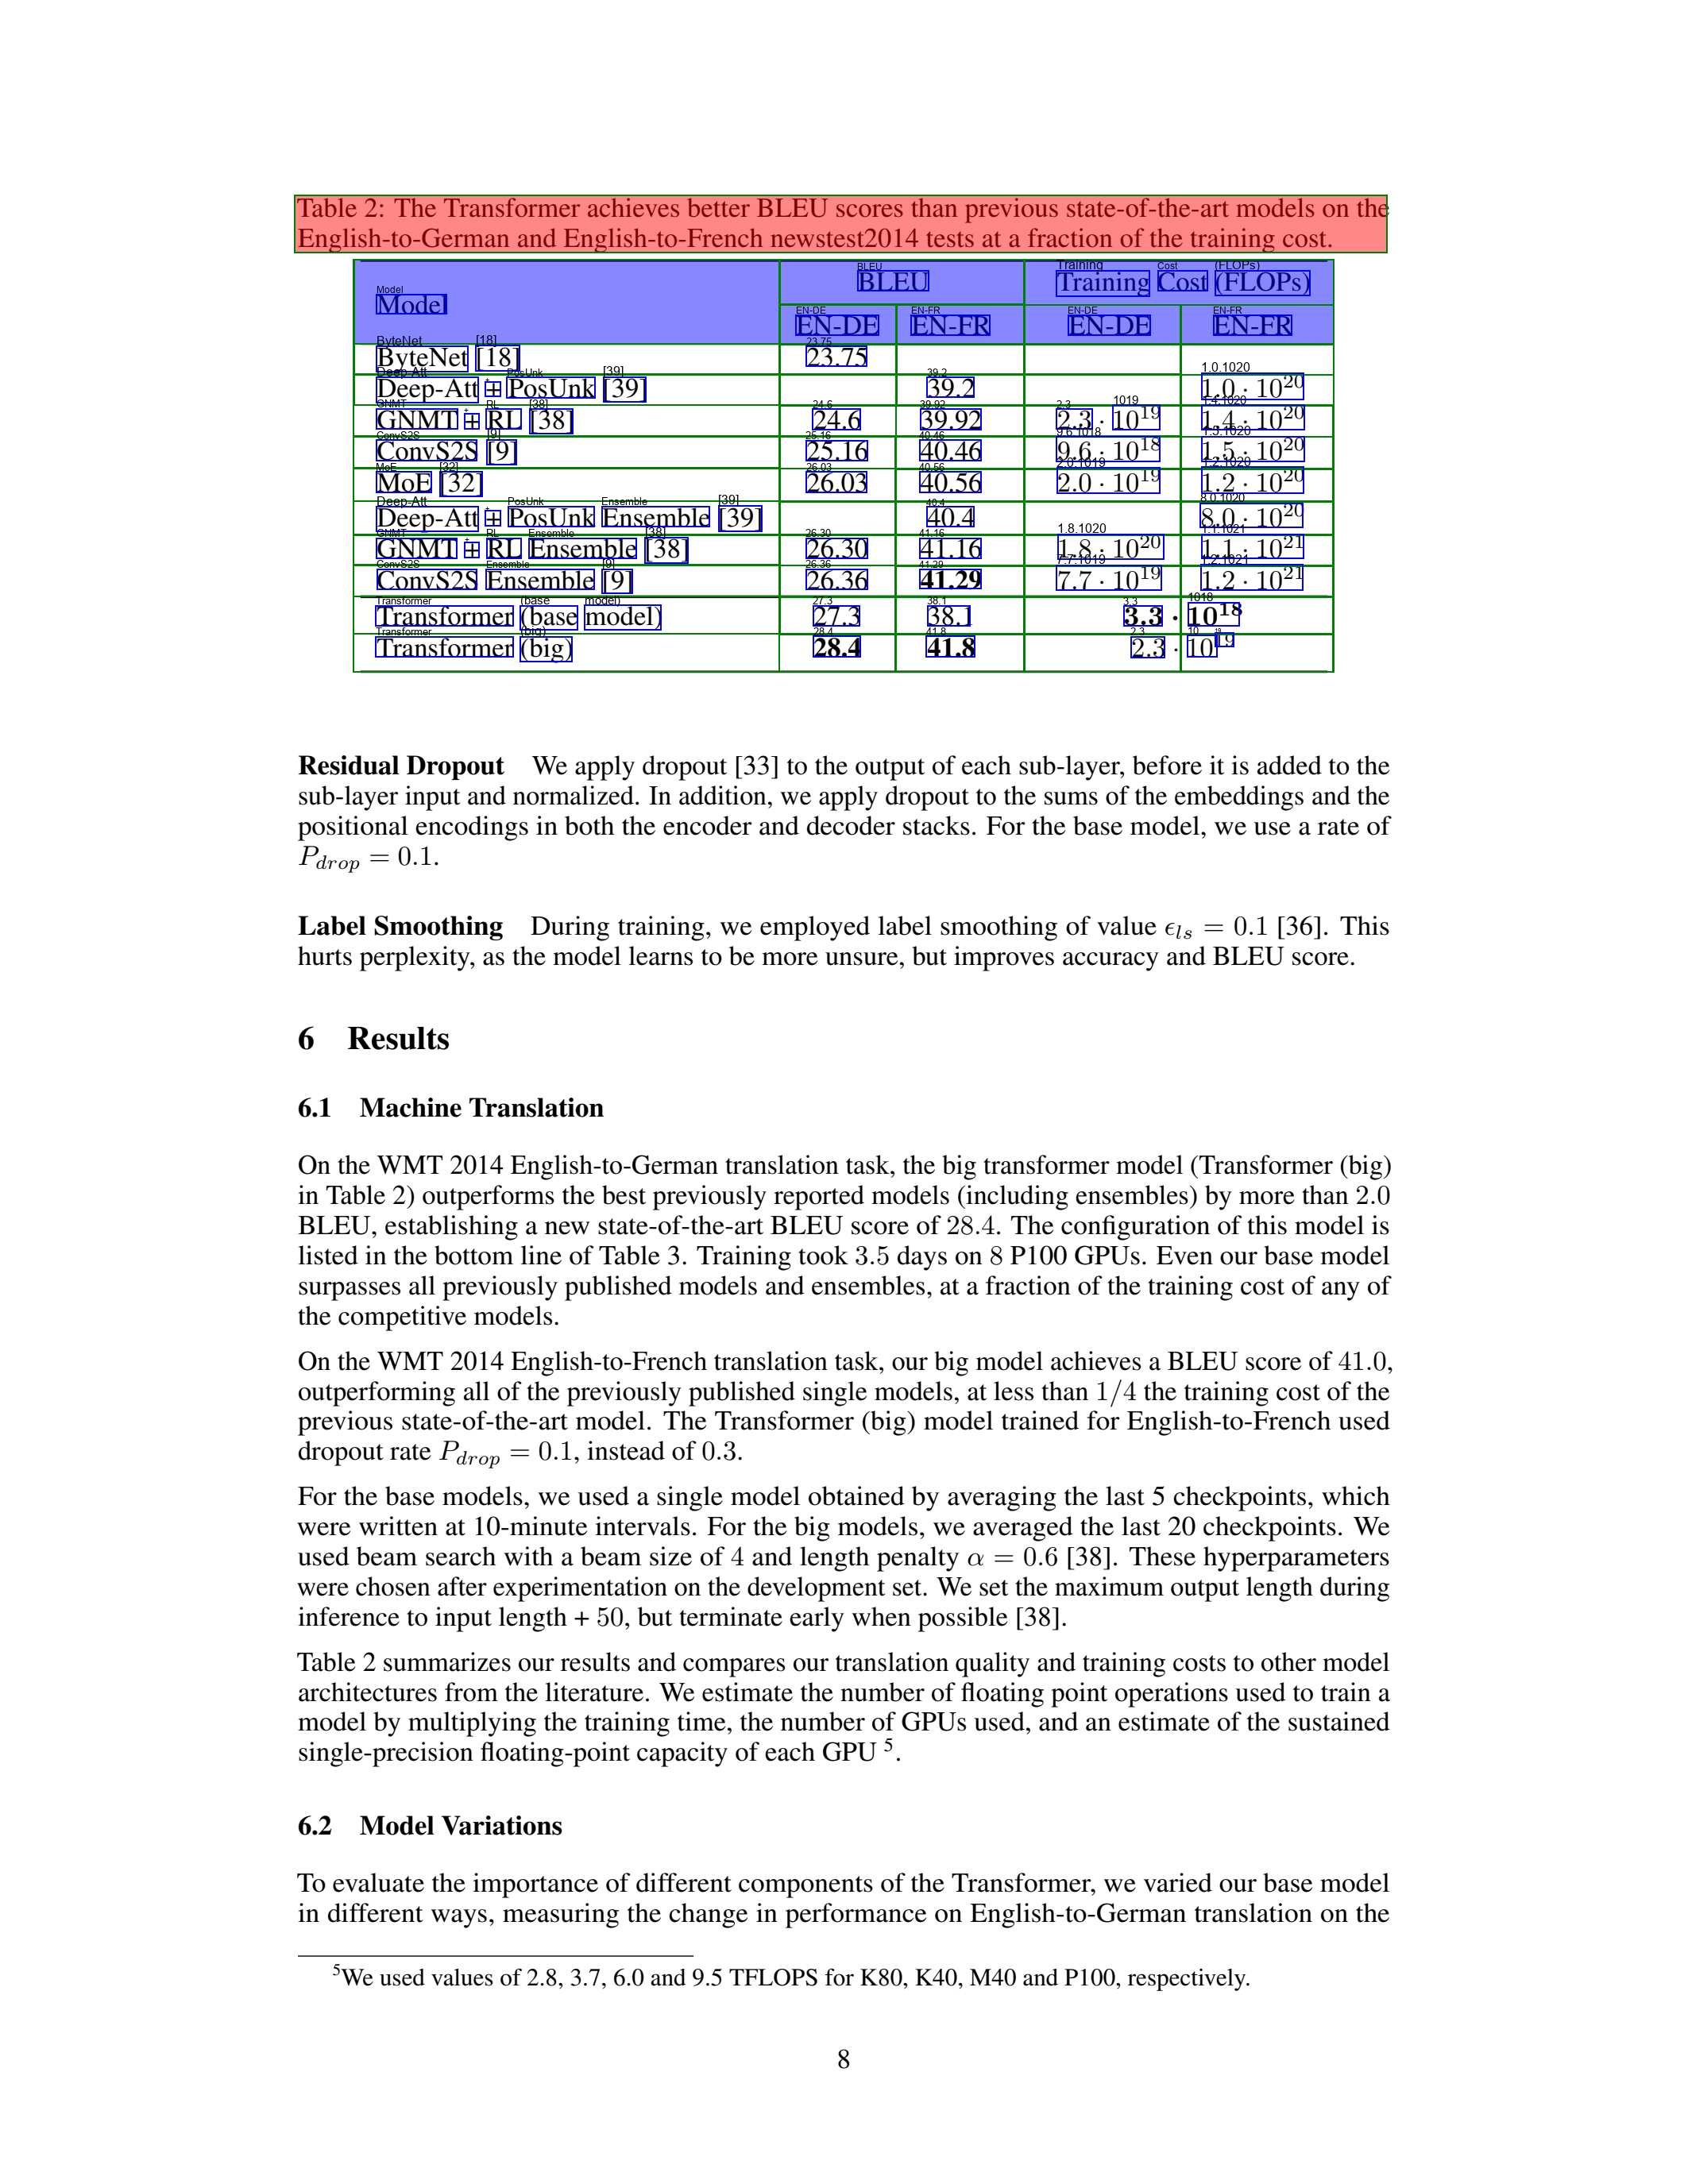

In [11]:
document.tables[3].visualize()

In [12]:
table_aware_text = document.tables[3].get_text(TextLinearizationConfig(table_linearization_format='markdown'))
print(table_aware_text)

| Model                           | BLEU    |       | Training Cost (FLOPs)    |          |
|---------------------------------|---------|-------|--------------------------|----------|
|                                 | EN-DE   | EN-FR | EN-DE                    | EN-FR    |
| ByteNet [18]                    | 23.75   |       |                          |          |
| Deep-Att + PosUnk [39]          |         | 39.2  |                          | 1.0.1020 |
| GNMT + RL [38]                  | 24.6    | 39.92 | 2.3 1019                 | 1.4.1020 |
| ConvS2S [9]                     | 25.16   | 40.46 | 9.6.1018                 | 1.5.1020 |
| MoE [32]                        | 26.03   | 40.56 | 2.0.1019                 | 1.2.1020 |
| Deep-Att + PosUnk Ensemble [39] |         | 40.4  |                          | 8.0.1020 |
| GNMT + RL Ensemble [38]         | 26.30   | 41.16 | 1.8.1020                 | 1.1.1021 |
| ConvS2S Ensemble [9]            | 26.36   | 41.29 | 7.7.1019                 |

# Converting to HTML


In [13]:
from IPython.display import display, HTML
html= document.to_html()
display(HTML(html))

In [14]:
# Converting to Markdown

In [16]:
from IPython.display import display, Markdown as md
from ipywidgets import widgets, Layout

myvar = 10
my_md  = md(f"""There are {myvar} **elements** """)

display(widgets.HTML("<b>hello</b>")) # works fine
from IPython.display import display, HTML
markdown= document.to_markdown()
print(markdown)

HTML(value='<b>hello</b>')

Provided proper attribution is provided, Google hereby grants permission to reproduce the tables and figures in this paper solely for use in journalistic or scholarly works. 

# Attention Is All You Need 



| Ashish Vaswani*                  | Noam Shazeer*                | Niki Parmar*                     | Jakob Uszkoreit*               |
|----------------------------------|------------------------------|----------------------------------|--------------------------------|
| Google Brain avaswani@google.com | Google Brain noam@google.com | Google Research nikip@google.com | Google Research usz@google.com |





|                                               |                                                              |                                                     |
|-----------------------------------------------|--------------------------------------------------------------|-----------------------------------------------------|
| Llion Jones* Google Research llion@google.c

In [ ]:
## Get